<a href="https://colab.research.google.com/github/AlexeyMakovskiy/diplomHSE/blob/main/diplom_HSE(ru_2000).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Парсинг сайтов с чартами... может не нужен.

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
r = requests.get('http://c.hotcharts.net/rusradio/archive/2004.htm')

In [ ]:
r.ok

In [ ]:
# Assuming 'r' is your response object
html_content = r.text

# Now you can create a BeautifulSoup object with the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

In [ ]:
for element in soup.find_all(class_="song_title visible"):
    print(element.text)

датасет  Genius Song Lyrics

Часть 1 Предобработка

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz

In [ ]:
# Тематическое моделирование

import spacy
import pandas as pd
import requests
from nltk.corpus import stopwords
from nltk import download
import gensim
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

download('stopwords')
df = pd.read_csv('https://raw.githubusercontent.com/AlexeyMakovskiy/diplomHSE/main/df_2000_2010(ru).csv')
df.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9045 entries, 0 to 9044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0.1   9045 non-null   int64 
 1   Unnamed: 0     9045 non-null   int64 
 2   title          9045 non-null   object
 3   tag            8983 non-null   object
 4   artist         9045 non-null   object
 5   year           9045 non-null   int64 
 6   views          9045 non-null   int64 
 7   features       9045 non-null   object
 8   lyrics         9045 non-null   object
 9   id             9045 non-null   int64 
 10  language_cld3  9045 non-null   object
 11  language_ft    9045 non-null   object
 12  language       9045 non-null   object
dtypes: int64(5), object(8)
memory usage: 918.8+ KB


Часть 1.1 Моделирование общего корпуса

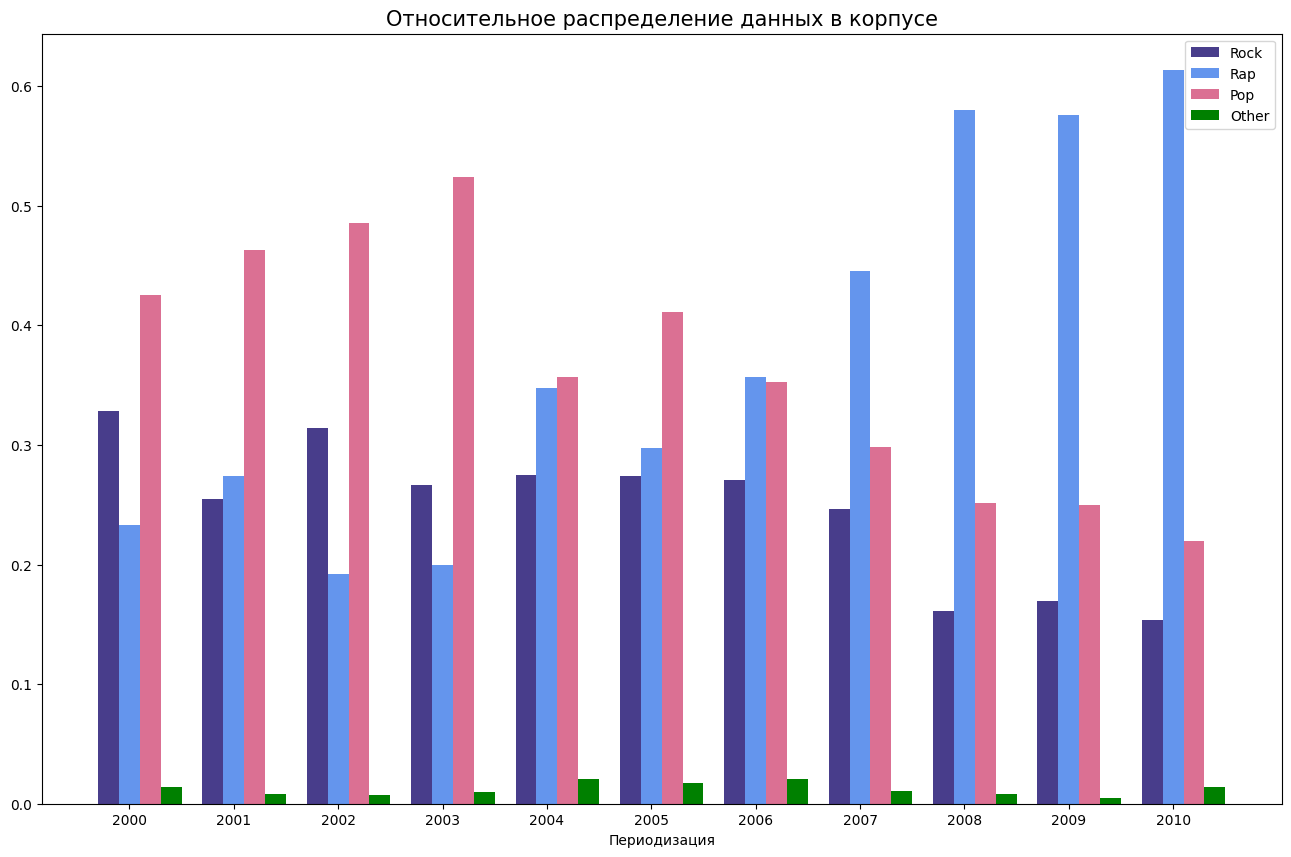

In [ ]:
# Визуальзация структуры корпуса
df_ru_2000 = df[(df['year']== 2000)].sort_values(by=['tag'])
df_ru_2001 = df[(df['year']== 2001)].sort_values(by=['tag'])
df_ru_2002 = df[(df['year']== 2002)].sort_values(by=['tag'])
df_ru_2003 = df[(df['year']== 2003)].sort_values(by=['tag'])
df_ru_2004 = df[(df['year']== 2004)].sort_values(by=['tag'])
df_ru_2005 = df[(df['year']== 2005)].sort_values(by=['tag'])
df_ru_2006 = df[(df['year']== 2006)].sort_values(by=['tag'])
df_ru_2007 = df[(df['year']== 2007)].sort_values(by=['tag'])
df_ru_2008 = df[(df['year']== 2008)].sort_values(by=['tag'])
df_ru_2009 = df[(df['year']== 2009)].sort_values(by=['tag'])
df_ru_2010 = df[(df['year']== 2010)].sort_values(by=['tag'])

colors = ['darkslateblue', 'cornflowerblue', 'palevioletred', 'green']
period = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']


rock = [len(df_ru_2000[(df_ru_2000['tag'] == 'rock')])/len(df_ru_2000),
        len(df_ru_2001[(df_ru_2001['tag'] == 'rock')])/len(df_ru_2001),
        len(df_ru_2002[(df_ru_2002['tag'] == 'rock')])/len(df_ru_2002),
        len(df_ru_2003[(df_ru_2003['tag'] == 'rock')])/len(df_ru_2003),
        len(df_ru_2004[(df_ru_2004['tag'] == 'rock')])/len(df_ru_2004),
        len(df_ru_2005[(df_ru_2005['tag'] == 'rock')])/len(df_ru_2005),
        len(df_ru_2006[(df_ru_2006['tag'] == 'rock')])/len(df_ru_2006),
        len(df_ru_2007[(df_ru_2007['tag'] == 'rock')])/len(df_ru_2007),
        len(df_ru_2008[(df_ru_2008['tag'] == 'rock')])/len(df_ru_2008),
        len(df_ru_2009[(df_ru_2009['tag'] == 'rock')])/len(df_ru_2009),
        len(df_ru_2010[(df_ru_2010['tag'] == 'rock')])/len(df_ru_2010)]

rap = [len(df_ru_2000[(df_ru_2000['tag'] == 'rap')])/len(df_ru_2000),
       len(df_ru_2001[(df_ru_2001['tag'] == 'rap')])/len(df_ru_2001),
       len(df_ru_2002[(df_ru_2002['tag'] == 'rap')])/len(df_ru_2002),
       len(df_ru_2003[(df_ru_2003['tag'] == 'rap')])/len(df_ru_2003),
       len(df_ru_2004[(df_ru_2004['tag'] == 'rap')])/len(df_ru_2004),
       len(df_ru_2005[(df_ru_2005['tag'] == 'rap')])/len(df_ru_2005),
       len(df_ru_2006[(df_ru_2006['tag'] == 'rap')])/len(df_ru_2006),
       len(df_ru_2007[(df_ru_2007['tag'] == 'rap')])/len(df_ru_2007),
       len(df_ru_2008[(df_ru_2008['tag'] == 'rap')])/len(df_ru_2008),
       len(df_ru_2009[(df_ru_2009['tag'] == 'rap')])/len(df_ru_2009),
       len(df_ru_2010[(df_ru_2010['tag'] == 'rap')])/len(df_ru_2010)]

pop = [len(df_ru_2000[(df_ru_2000['tag'] == 'pop')])/len(df_ru_2000),
       len(df_ru_2001[(df_ru_2001['tag'] == 'pop')])/len(df_ru_2001),
       len(df_ru_2002[(df_ru_2002['tag'] == 'pop')])/len(df_ru_2002),
       len(df_ru_2003[(df_ru_2003['tag'] == 'pop')])/len(df_ru_2003),
       len(df_ru_2004[(df_ru_2004['tag'] == 'pop')])/len(df_ru_2004),
       len(df_ru_2005[(df_ru_2005['tag'] == 'pop')])/len(df_ru_2005),
       len(df_ru_2006[(df_ru_2006['tag'] == 'pop')])/len(df_ru_2006),
       len(df_ru_2007[(df_ru_2007['tag'] == 'pop')])/len(df_ru_2007),
       len(df_ru_2008[(df_ru_2008['tag'] == 'pop')])/len(df_ru_2008),
       len(df_ru_2009[(df_ru_2009['tag'] == 'pop')])/len(df_ru_2009),
       len(df_ru_2010[(df_ru_2010['tag'] == 'pop')])/len(df_ru_2010)]

other = [len(df_ru_2000[(df_ru_2000['tag'] != 'rock')&(df_ru_2000['tag'] != 'pop')&(df_ru_2000['tag'] != 'rap')])/len(df_ru_2000),
         len(df_ru_2001[(df_ru_2001['tag'] != 'rock')&(df_ru_2001['tag'] != 'pop')&(df_ru_2001['tag'] != 'rap')])/len(df_ru_2001),
         len(df_ru_2002[(df_ru_2002['tag'] != 'rock')&(df_ru_2002['tag'] != 'pop')&(df_ru_2002['tag'] != 'rap')])/len(df_ru_2002),
         len(df_ru_2003[(df_ru_2003['tag'] != 'rock')&(df_ru_2003['tag'] != 'pop')&(df_ru_2003['tag'] != 'rap')])/len(df_ru_2003),
         len(df_ru_2004[(df_ru_2004['tag'] != 'rock')&(df_ru_2004['tag'] != 'pop')&(df_ru_2004['tag'] != 'rap')])/len(df_ru_2004),
         len(df_ru_2005[(df_ru_2005['tag'] != 'rock')&(df_ru_2005['tag'] != 'pop')&(df_ru_2005['tag'] != 'rap')])/len(df_ru_2005),
         len(df_ru_2006[(df_ru_2006['tag'] != 'rock')&(df_ru_2006['tag'] != 'pop')&(df_ru_2006['tag'] != 'rap')])/len(df_ru_2006),
         len(df_ru_2007[(df_ru_2007['tag'] != 'rock')&(df_ru_2007['tag'] != 'pop')&(df_ru_2007['tag'] != 'rap')])/len(df_ru_2007),
         len(df_ru_2008[(df_ru_2008['tag'] != 'rock')&(df_ru_2008['tag'] != 'pop')&(df_ru_2008['tag'] != 'rap')])/len(df_ru_2008),
         len(df_ru_2009[(df_ru_2009['tag'] != 'rock')&(df_ru_2009['tag'] != 'pop')&(df_ru_2009['tag'] != 'rap')])/len(df_ru_2009),
         len(df_ru_2010[(df_ru_2010['tag'] != 'rock')&(df_ru_2010['tag'] != 'pop')&(df_ru_2010['tag'] != 'rap')])/len(df_ru_2010)]

# Multi bar Chart
plt.figure(figsize=(16,10))

x_axis = np.arange(len(period))
plt.bar(x_axis, rock, color = colors[0], width=0.2, label = 'Rock')
plt.bar(x_axis +0.2, rap, color = colors[1], width=0.2, label = 'Rap')
plt.bar(x_axis +0.2*2, pop, color = colors[2], width=0.2, label = 'Pop')
plt.bar(x_axis +0.2*3, other, color = colors[3], width=0.2, label = 'Other')

plt.xticks(x_axis+0.2, period)

# Add x and ylabels
plt.xlabel('Периодизация')
#plt.ylabel('Количество вхождений в базе данных')
plt.title(label="Относительное распределение данных в корпусе",
          fontsize=15,
          color="black")
plt.legend()
plt.show()



из построенных гистограмм видно, что относительное количество RAP песен возрастает после 2007г. Что скорее может свидетельствовать о развитии жанра и интереса к нему.

In [ ]:
# Собираем текст из слов

full_texts = []
for index, row in df.iterrows():
    if (pd.notnull(row['lyrics'])) and (row['year'] == 2000):
        full_texts.append(row['lyrics'])

In [ ]:
full_texts[1:10]

['Здесь когда-то звенели птицы\nНам осталось от них тепло\nА теперь лишь туман ложится\nНа расплавленное стекло\n\nНа земле\u2005этой\u2005были люди\nПросто люди\u2005как мы с тобой\nБольше здесь ничего\u2005не будет\nНет здесь места и нам с тобой\n\nПрипев:\nА на что\u205fмне\u205fнебо\nДа\u205fзачем эти звезды\nЕсли\u205fя останусь один\nКто\u205fже мне ответит\nНа все эти вопросы\nЕсли я останусь один\n\nИз ладони струится порох\nДа смеется огонь в руке\nЗастилает крылами ворон\nТо, что важным казалось мне\nНеприветливый свет напрасно\nРасплетает тугой клубок\nИз нелепых забытых сказок\nДа мерцающих облаков\n\nПрипев:\nА на что мне небо\nДа зачем эти звезды\nЕсли я останусь один\nКто же мне ответит\nНа все эти вопросы\nЕсли я останусь один\nА на что мне небо\nДа зачем эти звезды\nЕсли я останусь один\nКто же мне ответит\nНа все эти вопросы\nЕсли я останусь один\n\nА на что мне небо\nДа зачем эти звезды\nЕсли я останусь один\nКто же мне ответит\nНа все эти вопросы\nЕсли я останусь од

In [ ]:
punctuation = '!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~—»«...–'
response = requests.get('https://raw.githubusercontent.com/AlexeyMakovskiy/diplomHSE/main/ru_stopwords.txt')
stopwords_ru = response.text.splitlines()
filter = stopwords.words('russian') + list(punctuation) + stopwords_ru

In [ ]:
# Функция для предобработки, которая токенизирует, лемматизирует и делает все буквы строчными
def preprocess(input_text):
    nlp = spacy.load("ru_core_news_sm")
    tokenized_text = nlp(input_text)
    lowercase_text = [token.text.lower() for token in tokenized_text]
    # убираем пунктуацию и стоп-слова:
    output_text = [token for token in lowercase_text if token not in filter]
    clean_text = [word for word in output_text if word.isalpha()]
    return clean_text

In [ ]:
preprocessed_texts = []
for text in tqdm(full_texts):
    if isinstance(text, str):
        preprocessed_text = preprocess(text)
        preprocessed_texts.append(preprocessed_text)
    else:
        continue

  0%|          | 0/494 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
100%|██████████| 494/494 [14:31<00:00,  1.76s/it]


In [ ]:
# Сохранить предобработанный текст
import google.colab.files as gfile
with open('drive/My Drive/HSE_diploma/file.txt', 'w') as output:
    output.write(str(preprocessed_texts))

## Тут начинается непосредственно моделирование

---



In [ ]:
# Подгружаем подготовленный текст

from google.colab import drive
drive.mount('drive')
import google.colab.files as gfile

Mounted at drive


In [ ]:
with open('drive/My Drive/HSE_diploma/file.txt', 'r') as f:
    tokens = f.read()
preprocessed_texts_1 = tokens
print(preprocessed_texts_1)

[['вступление', 'отрывок', 'фильма', 'видите', 'возврошается', 'вспышка', 'прошлого', 'показать', 'начиналось', 'хочу', 'имею', 'ввиду', 'возвращаюсь', 'первоисточнику', 'иду', 'семя', 'посаженно', 'точке', 'отсчета', 'начиналось', 'делая', 'знание', 'знаете', 'предисловие', 'мс', 'приходит', 'выходит', 'оживить', 'оплодотворить', 'жить', 'униформу', 'принимая', 'форму', 'дать', 'движение', 'словам', 'рождение', 'ааайт', 'пути', 'начинает', 'идддттииии', 'стих', 'стихи', 'омофон', 'теку', 'микрофон', 'оперетой', 'самсона', 'укус', 'скарпион', 'сценарий', 'циклона', 'чилом', 'меготон', 'потоком', 'волн', 'крови', 'сценах', 'сражения', 'мегабар', 'давления', 'карбонаты', 'вадой', 'соединения', 'смеси', 'потоком', 'дунавения', 'ветров', 'движения', 'парусах', 'шествует', 'клетках', 'путешествует', 'уст', 'тэо', 'подобно', 'крео', 'выращивает', 'взращивает', 'привкусом', 'огней', 'ада', 'вкусом', 'идя', 'плод', 'чрева', 'актинойдом', 'иглой', 'шприца', 'игла', 'шприца', 'вводит', 'лицом', 

Тематическое моделирование (анализ частотностей TF-IDF)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import string
import glob
import re

In [ ]:
# Функция для предобработки, которая делает все буквы строчными и удаляет стопслова
def prep_tfidf(input_text):
    words = input_text.split()
    final = []
    for word in words:
        word = word.lower()
        if word not in filter:
            final.append(word)
    final = " ".join(final)
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)


In [ ]:
cleaned_docs = []
for text in (full_texts):
    if isinstance(text, str):
        preprocessed_text = prep_tfidf(text)
        cleaned_docs.append(preprocessed_text)
    else:
        continue

cleaned_docs[1]

'когда-то звенели птицы осталось тепло туман ложится расплавленное стекло земле места припев: небо звезды останусь ответит вопросы останусь ладони струится порох смеется огонь руке застилает крылами ворон то, важным казалось неприветливый свет напрасно расплетает тугой клубок нелепых забытых сказок мерцающих облаков припев: небо звезды останусь ответит вопросы останусь небо звезды останусь ответит вопросы останусь небо звезды останусь ответит вопросы останусь'

In [ ]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,3),
                                stop_words = filter
                      )

vectors = vectorizer.fit_transform(cleaned_docs)

feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()

In [ ]:
vectors.toarray()[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.25124337, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.86798379,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27730571, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
#print (full_texts[0])
print (all_keywords[2])

['вместе', 'знаешь', 'знаю', 'навсегда', 'свой']


In [ ]:
true_k = 10

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [ ]:
#разделение на кластеры
with open ("/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")



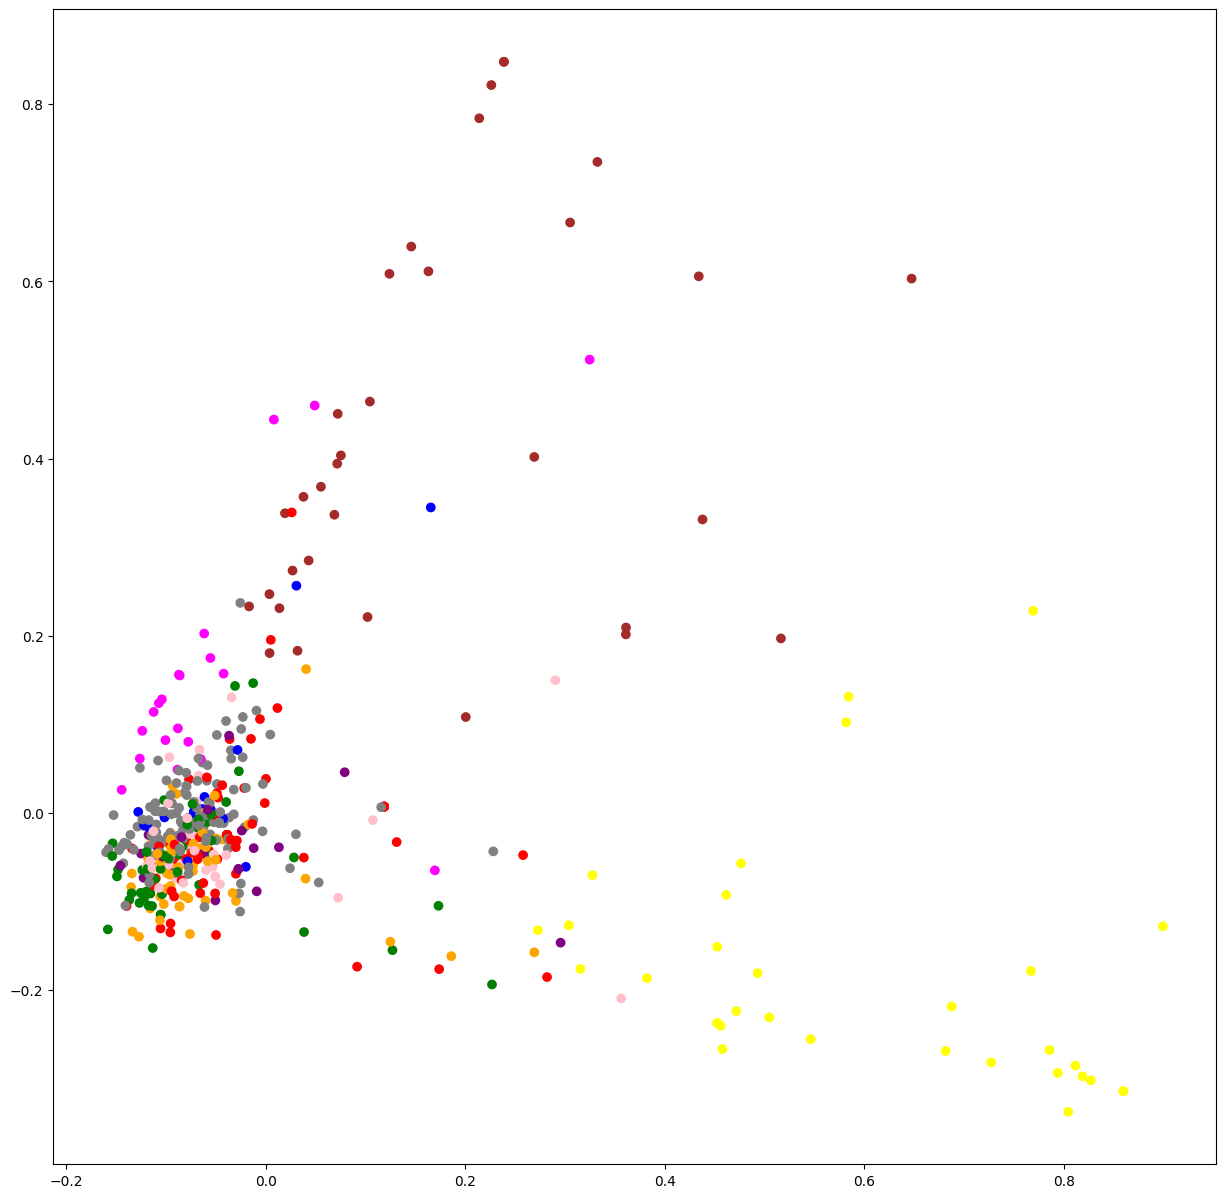

<Figure size 640x480 with 0 Axes>

In [ ]:
#Визуализация
kmeans_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = {
    0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'magenta',
    5: 'pink', 6: 'grey', 7: 'yellow', 8: 'brown', 9: 'purple'
}

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmeans_indices])



plt.show()
plt.savefig('trc.png')


In [ ]:
#посчитаем счетчиком
def count_numbers(arr):
   counts = [0 for _ in range(10)]
   for num in arr:
     counts[num] += 1
   return counts

counts = count_numbers(kmeans_indices)
counts


[68, 54, 18, 59, 20, 42, 148, 32, 33, 20]

Тематическое моделирование LDA

In [ ]:
# Создаем словарь из получившихся токенов

gensim_dictionary_for_TM = gensim.corpora.Dictionary(preprocessed_texts)
gensim_dictionary_for_TM.filter_extremes(no_above=0.1) # , no_below=20
gensim_dictionary_for_TM.compactify()
print(gensim_dictionary_for_TM)

Dictionary<1439 unique tokens: ['ада', 'бегут', 'большой', 'вид', 'выходит']...>


In [ ]:
corpus = [gensim_dictionary_for_TM.doc2bow(text) for text in preprocessed_texts]

In [ ]:
# раскладываем по "мешкам"

lda = gensim.models.LdaMulticore(corpus,
                                 num_topics = 10, # число топиков
                                 id2word=gensim_dictionary_for_TM,
                                 passes=10)

In [ ]:
lda.print_topics()

[(0,
  '0.021*"девушка" + 0.020*"словами" + 0.017*"печаль" + 0.016*"мою" + 0.013*"своими" + 0.013*"пусть" + 0.013*"слёзы" + 0.012*"тихий" + 0.011*"децл" + 0.011*"рай"'),
 (1,
  '0.016*"ради" + 0.016*"лети" + 0.015*"дела" + 0.012*"кровь" + 0.008*"равно" + 0.008*"слышишь" + 0.007*"моей" + 0.007*"денег" + 0.007*"готов" + 0.007*"закрой"'),
 (2,
  '0.046*"шеff" + 0.039*"ветер" + 0.023*"любишь" + 0.011*"вышел" + 0.011*"окном" + 0.011*"i" + 0.010*"рэп" + 0.009*"you" + 0.009*"деле" + 0.009*"hop"'),
 (3,
  '0.022*"бала" + 0.020*"море" + 0.018*"мама" + 0.014*"подожди" + 0.014*"видишь" + 0.014*"солнце" + 0.011*"позови" + 0.011*"чача" + 0.011*"чили" + 0.010*"знаешь"'),
 (4,
  '0.026*"рай" + 0.019*"руках" + 0.018*"килиманджаро" + 0.018*"потерянный" + 0.016*"богиня" + 0.015*"черная" + 0.015*"дай" + 0.015*"огня" + 0.012*"твоих" + 0.012*"the"'),
 (5,
  '0.015*"ума" + 0.013*"слово" + 0.013*"хотим" + 0.012*"уходи" + 0.011*"последний" + 0.011*"деньги" + 0.011*"йоу" + 0.010*"нужна" + 0.010*"ха" + 0.009*"м

Визуализация LDA

In [ ]:
# Визуализация с помощью pyLDAvis
!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
vis = gensimvis.prepare(lda, corpus, gensim_dictionary_for_TM)

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.000825  0.030078       1        1  12.385424
0      0.080205  0.113142       2        1  12.098076
1     -0.004477  0.068710       3        1  11.545258
2      0.115796  0.116329       4        1  10.786902
4      0.184396 -0.205323       5        1  10.464817
6     -0.002579  0.006994       6        1  10.116918
7      0.013285 -0.074151       7        1   9.721860
3     -0.201978 -0.106787       8        1   8.535096
8     -0.106558  0.034069       9        1   8.504185
9     -0.078916  0.016939      10        1   5.841464, topic_info=         Term        Freq       Total Category  logprob  loglift
1331     шеff  154.000000  154.000000  Default  30.0000  30.0000
464     ветер  141.000000  141.000000  Default  29.0000  29.0000
613       рай   99.000000   99.000000  Default  28.0000  28.0000
1021   любишь   73.000000   73.000000  Default  27.0000  27.0000
1129  девушка   68.000000   68.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
639      одна    9.544816   74.478227  Topic10  -4.9970   0.7857
241     среди    8.383634   37.708272  Topic10  -5.1267   1.3366
285      моей    8.528062   82.698232  Topic10  -5.1096   0.5684
404    прости    7.821337   34.773118  Topic10  -5.1962   1.3482
684     домой    7.713787   56.660283  Topic10  -5.2100   0.8461

[541 rows x 6 columns], token_table=      Topic      Freq Term
term                      
81        3  0.050878    a
81        4  0.152635    a
81        5  0.534222    a
81        6  0.254391    a
1323      2  0.084227  hip
...     ...       ...  ...
244       2  0.770406   юг
244       3  0.035018   юг
244       4  0.140074   юг
1181      1  0.788716  юга
1181      3  0.131453  юга

[1908 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 2, 3, 5, 7, 8, 4, 9, 10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


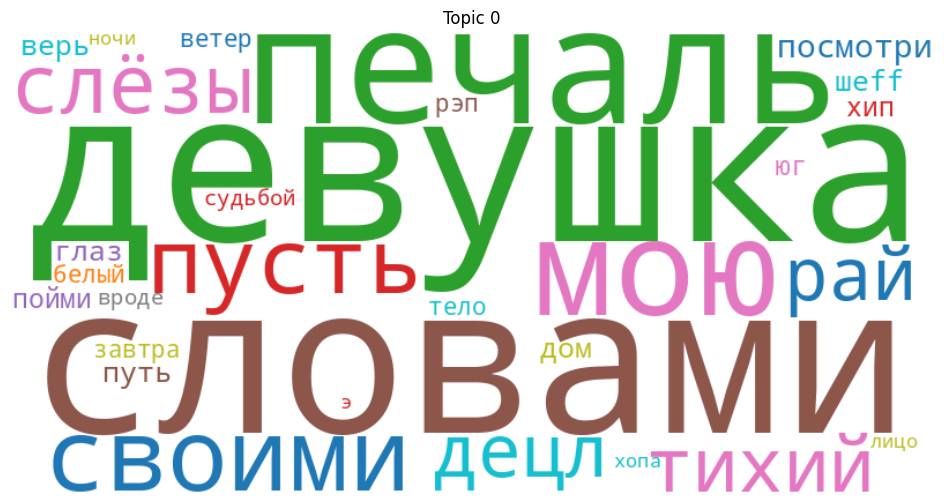

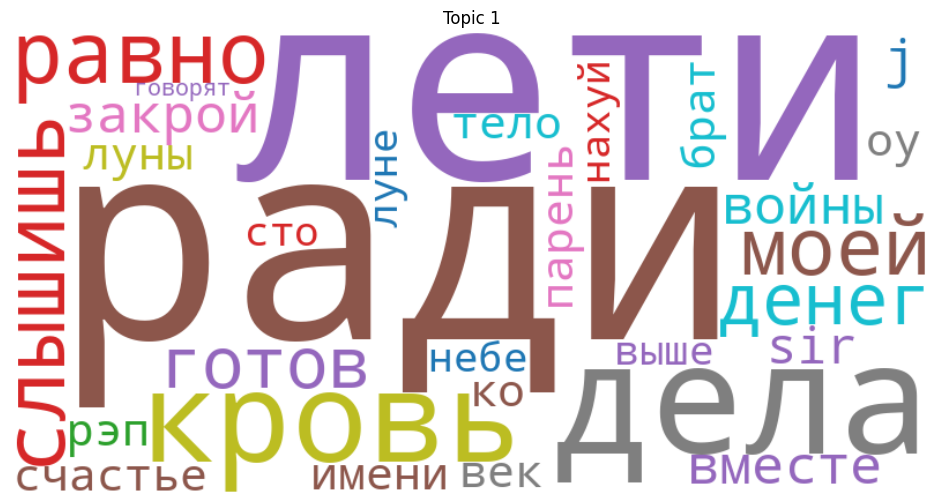

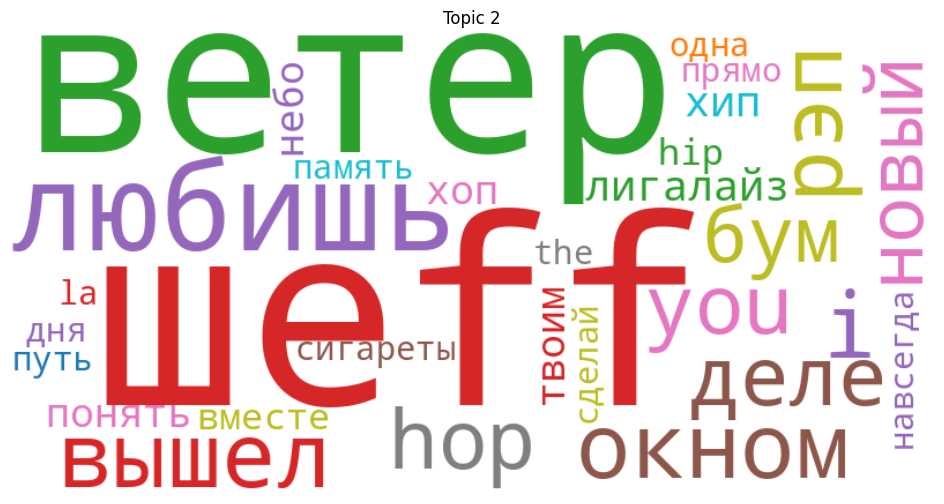

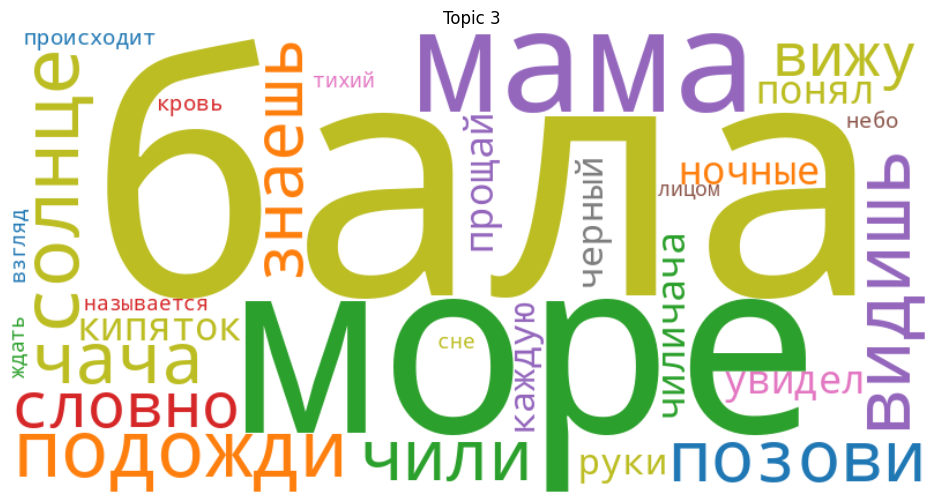

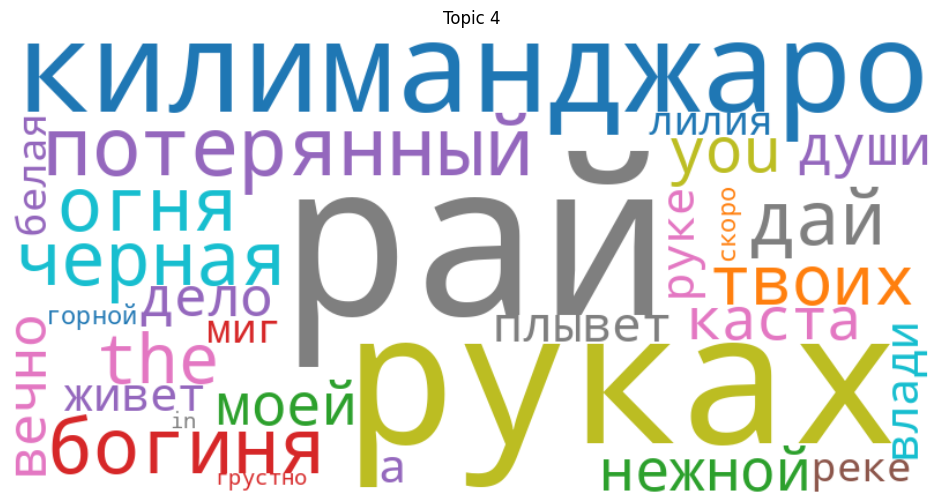

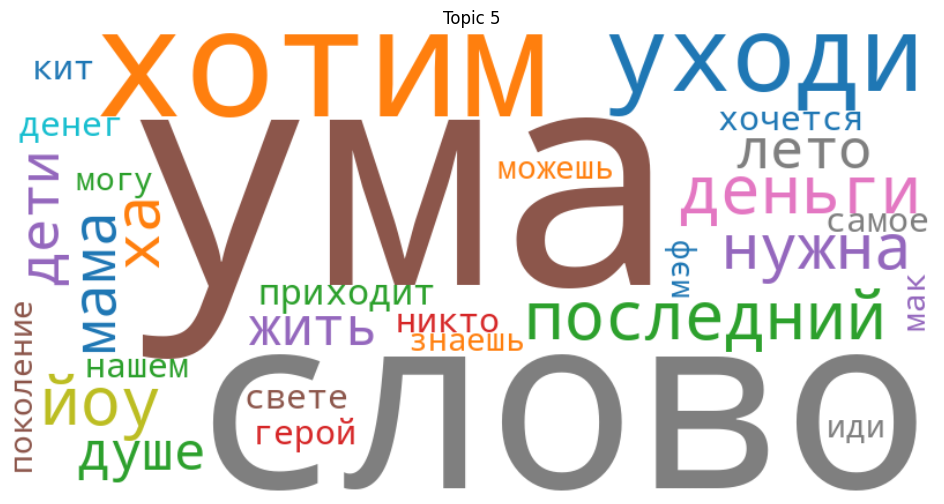

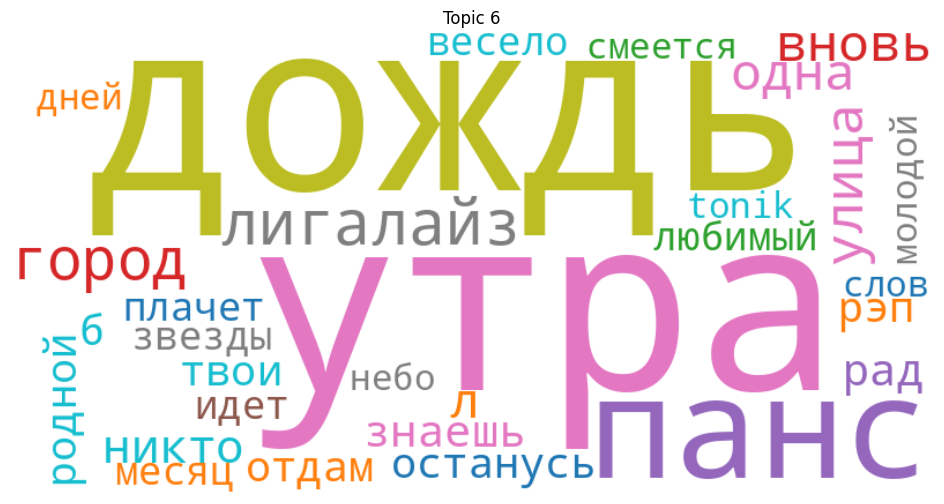

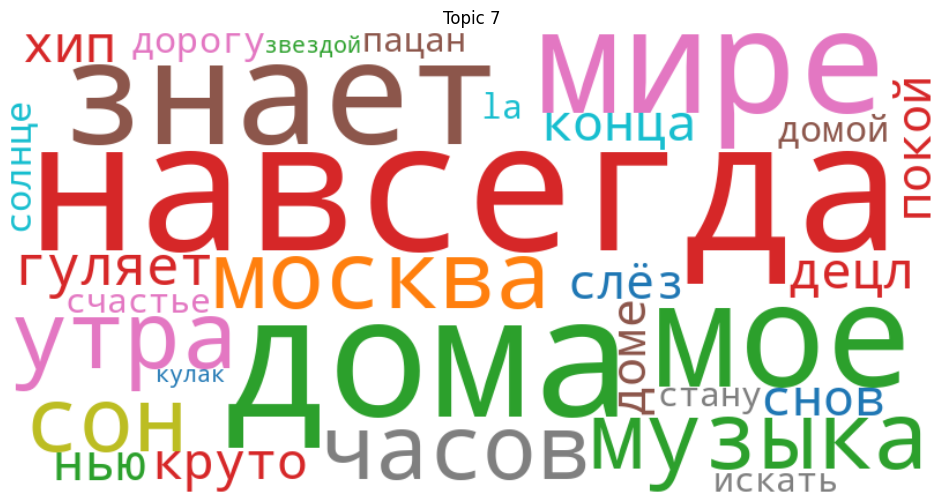

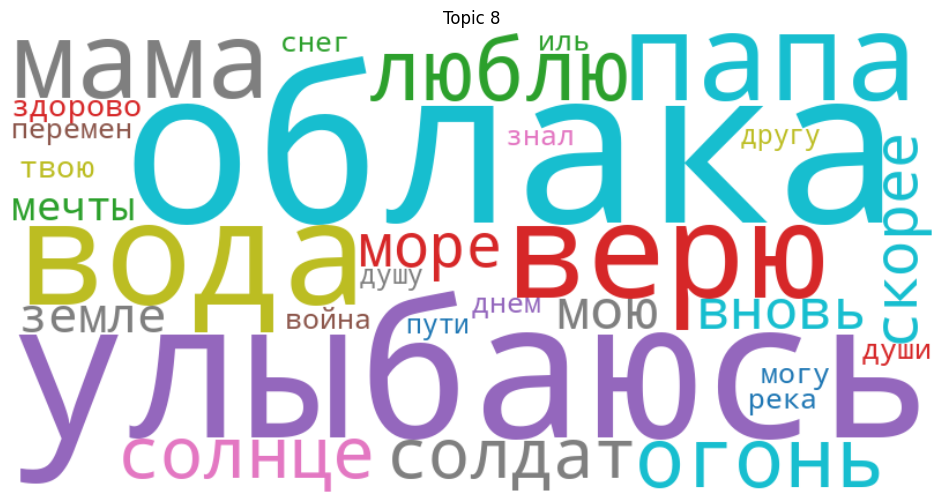

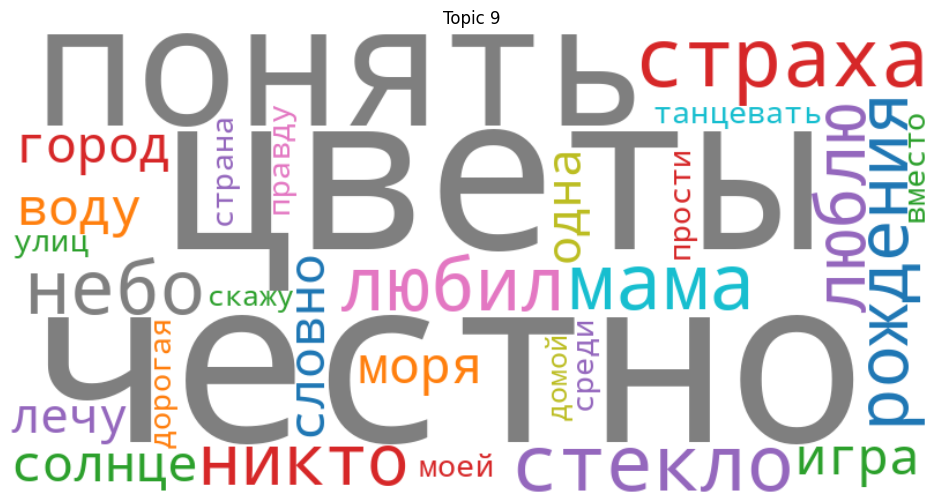

In [ ]:
# Визуализироем с помощью вордклауд

num_topics = 10

for topic in lda.show_topics(num_topics=num_topics, num_words=30, formatted=False):
    topic_num = topic[0]
    words = dict(topic[1])
    weights = {word: round(weight * 1000) for word, weight in words.items()}

    wordcloud = WordCloud(background_color="white", width=800, height=400, colormap="tab10").generate_from_frequencies(weights)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num}")
    plt.show()